In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, linear_model, metrics, preprocessing, neighbors, tree, ensemble, svm
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
# Check for null values in the dataset
null_values=df.isnull().sum()
null_values


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [5]:
df=df.dropna()
df.shape

(9360, 13)

In [6]:
df.Size

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10834,2.6M
10836,53M
10837,3.6M
10839,Varies with device


In [7]:
def clean_size(x):
    if 'K' in x:
        return (float(x.replace('K','')))
    elif 'M' in x:
        return (float(x.replace('M','')))*1000
    else:
        return None

df['Size']=df['Size'].apply(clean_size)


In [8]:
df['Size']

,Size
0,19000.0
1,14000.0
2,8700.0
3,25000.0
4,2800.0
...,...
10834,2600.0
10836,53000.0
10837,3600.0
10839,NaN


In [9]:
# Convert 'Reviews' column to numeric
df['Reviews']=pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'].dtype

dtype('int64')

In [10]:
df['Installs']=df['Installs'].str.replace('+','').str.replace(',','').astype(int)
df['Installs'].dtype

dtype('int64')

In [11]:
df['Installs']

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
10834,500
10836,5000
10837,100
10839,1000


In [12]:
df['Price']=df['Price'].str.replace('$','').astype(float)
df['Price'].dtype

dtype('float64')

In [13]:
df=df[(df['Rating']>=1) & (df['Rating']<=5)]


In [14]:
df=df[df['Reviews'] <= df['Installs']]

In [15]:
df.shape

(9353, 13)

In [16]:
df=df[~((df['Type'] =='Free') & (df['Price'] > 0))]

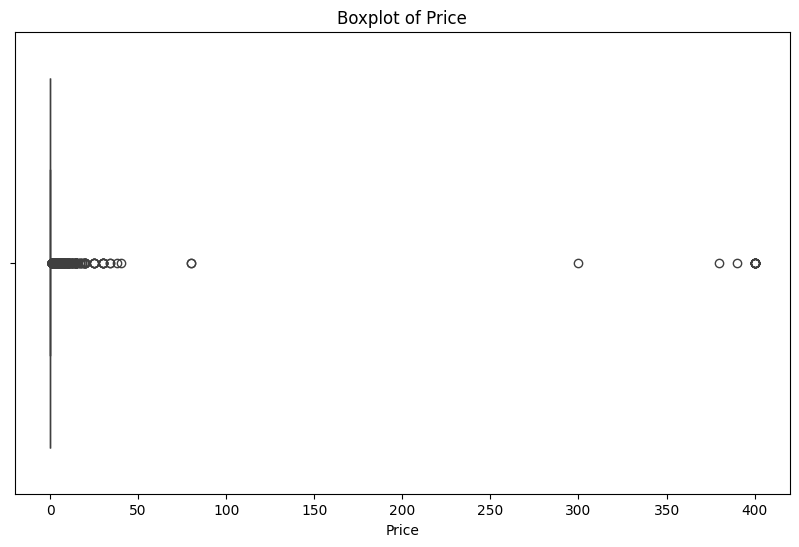

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

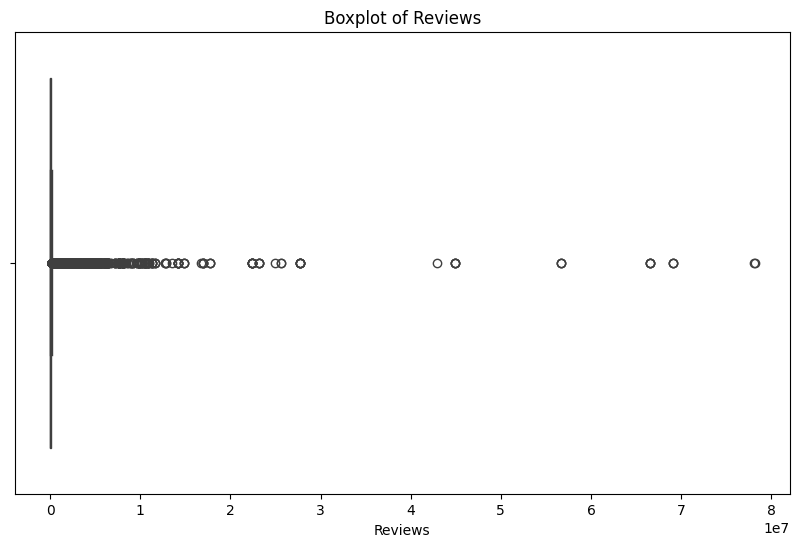

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Reviews'])
plt.title('Boxplot of Reviews')
plt.show()

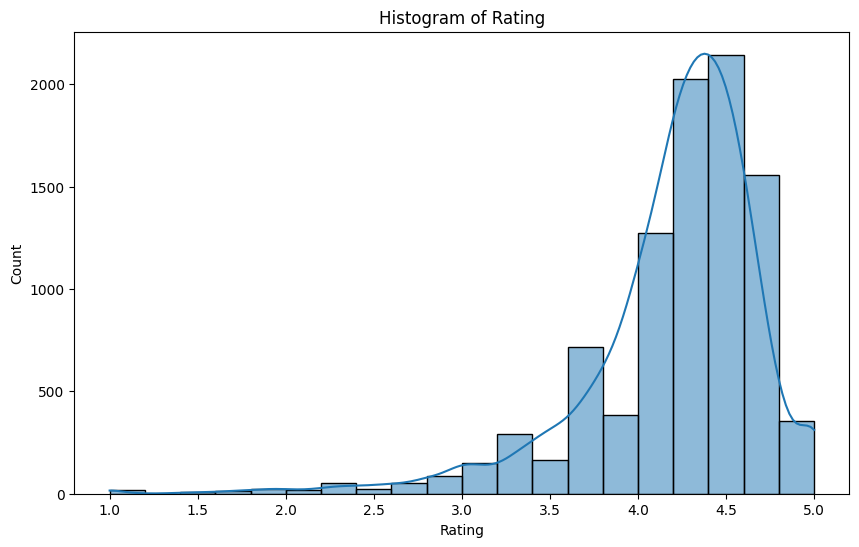

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Histogram of Rating')
plt.show()

In [20]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,NaN,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [21]:
df=df[df['Price']<=200]

In [22]:
df[df['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,NaN,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [23]:
df=df[df['Reviews']<=2000000]

In [24]:
percentiles = df['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])
print(percentiles)

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [25]:
df=df[df['Installs']< df['Installs'].quantile(0.99)]

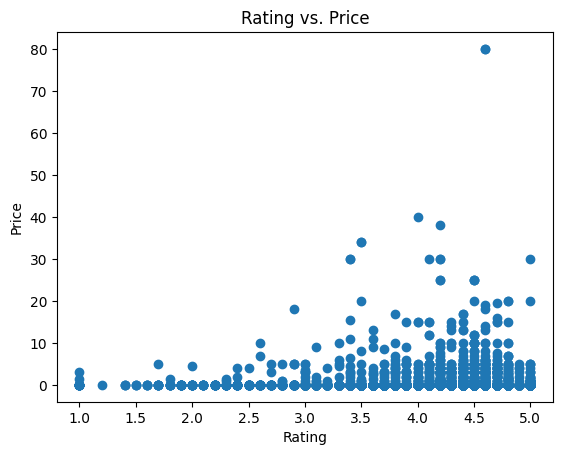

In [26]:
plt.scatter(x='Rating',y='Price',data=df)
plt.title('Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

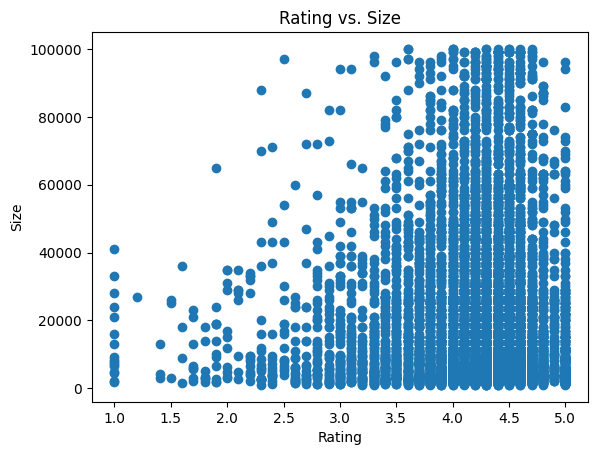

In [27]:
plt.scatter(x='Rating',y='Size',data=df)
plt.title('Rating vs. Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

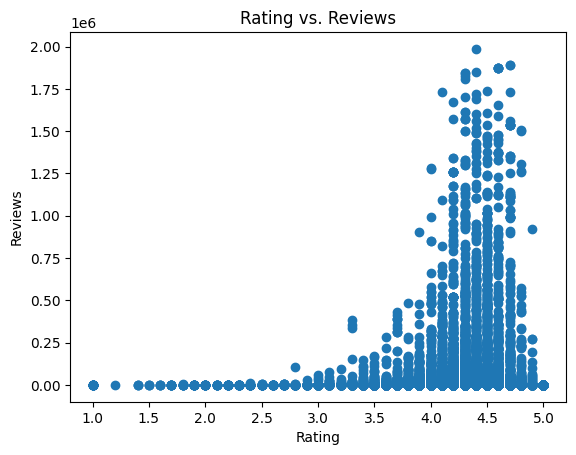

In [28]:
plt.scatter(x='Rating',y='Reviews',data=df)
plt.title('Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

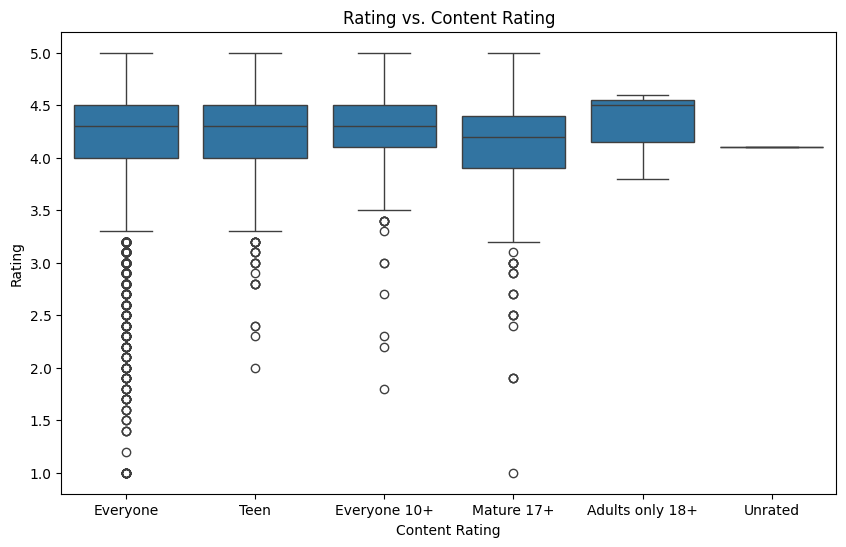

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.title('Rating vs. Content Rating')
plt.show()

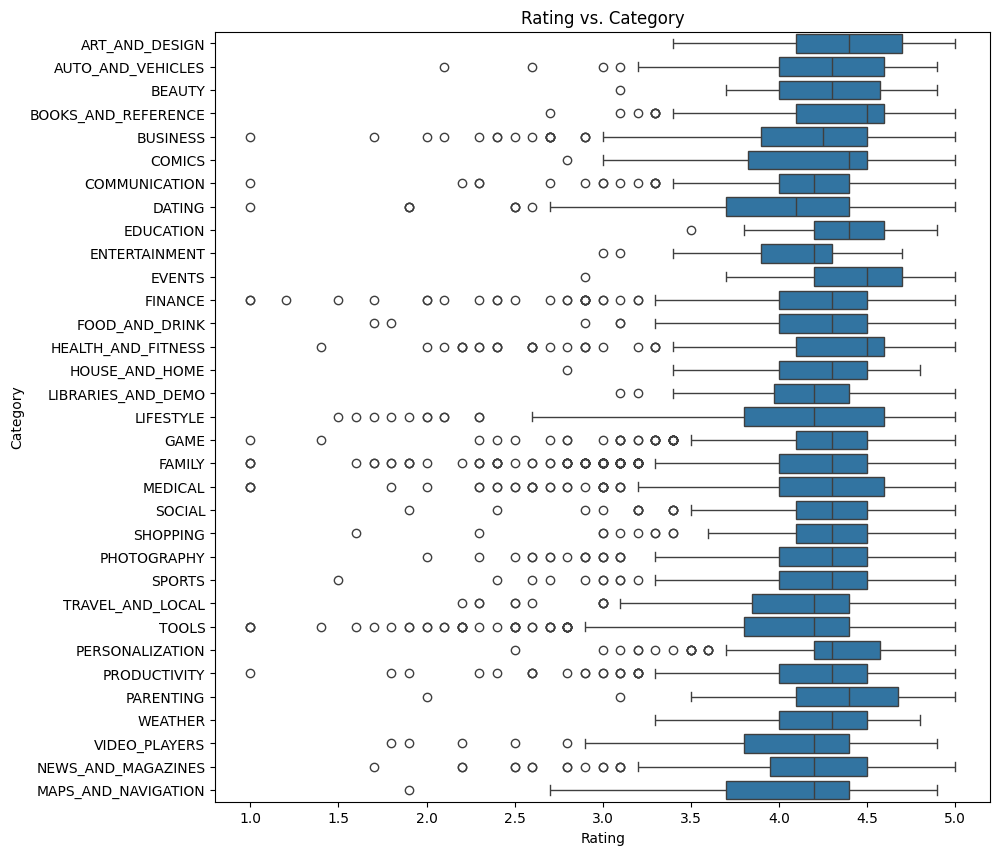

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Category', data=df)
plt.title('Rating vs. Category')
plt.show()

In [31]:
inp1=df.copy()

In [32]:
inp1['Reviews']=np.log1p(inp1['Reviews'])
inp1['Installs']=np.log1p(inp1['Installs'])


In [33]:
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)

In [44]:
inp2 = pd.get_dummies(inp1, columns=['Type','Category', 'Genres', 'Content Rating'], drop_first=True)

In [45]:
print(inp2.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type_Paid',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=157)


In [71]:
df1=df.dropna()

In [72]:
x=df1[['Size','Installs','Reviews','Price']]
y=df1['Rating']
x.shape,y.shape

((7167, 4), (7167,))

In [73]:
y_normalize=preprocessing.MinMaxScaler()
y_norm=y_normalize.fit_transform(y.values.reshape(-1,1))
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)


In [74]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y_norm.reshape(-1), test_size = 0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((5016, 4), (2151, 4), (5016,), (2151,))

In [75]:
r_model=linear_model.LinearRegression()
r_model.fit(x_train,y_train)
y_predict=r_model.predict(x_test)
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,y_predict)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_predict)}')
print(f'R2 Score: {metrics.r2_score(y_test,y_predict)}')

Mean Squared Error: 0.02009660492791321
Mean Absolute Error: 0.09849284213745593
R2 Score: 0.01987867249353037
